# Building Agents That Use Code

This notebook is part of the [Hugging Face Agents Course](https://www.hf.co/learn/agents-course), a free Course from beginner to expert, where you learn to build Agents.

![Agents course share](https://huggingface.co/datasets/agents-course/course-images/resolve/main/en/communication/share.png)

## Let's install the dependencies and login to our HF account to access the Inference API

If you haven't installed `smolagents` yet, you can do so by running the following command:

In [1]:
!pip install smolagents

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.6/104.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 33.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 2.2.3 which is incompatible.


Let's also login to the Hugging Face Hub to have access to the Inference API.

In [2]:
from huggingface_hub import notebook_login

notebook_login()

## The `@tool` Decorator  

### Generating a tool that retrieves the highest-rated catering

Let's imagine that Alfred has already decided on the menu for the party, but now he needs help preparing food for such a large number of guests. To do so, he would like to hire a catering service and needs to identify the highest-rated options available. Alfred can leverage a tool to search for the best catering services in his area.

Below is an example of how Alfred can use the `@tool` decorator to make this happen:

In [3]:
from smolagents import CodeAgent, HfApiModel, tool

# Let's pretend we have a function that fetches the highest-rated catering services.
@tool
def catering_service_tool(query: str) -> str:
    """
    This tool returns the highest-rated catering service in Gotham City.

    Args:
        query: A search term for finding catering services.
    """
    # Example list of catering services and their ratings
    services = {
        "Gotham Catering Co.": 4.9,
        "Wayne Manor Catering": 4.8,
        "Gotham City Events": 4.7,
    }

    # Find the highest rated catering service (simulating search query filtering)
    best_service = max(services, key=services.get)

    return best_service


agent = CodeAgent(tools=[catering_service_tool], model=HfApiModel())

# Run the agent to find the best catering service
result = agent.run(
    "Can you give me the name of the highest-rated catering service in Gotham City?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Can you give me the name of the highest-rated catering service in Gotham City?                                  │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  print(highest_rated_catering_service)                                                                            
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Gotham Catering Co.

Out: None

[Step 1: Duration 7.28 seconds| Input tokens: 2,077 | Output tokens: 65]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  highest_rated_catering_service = catering_service_tool(query="highest-rated catering service in Gotham City")    
  final_answer(highest_rated_catering_service)                                                                     
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Catering Co.

[Step 2: Duration 4.05 seconds| Input tokens: 4,324 | Output tokens: 151]

Gotham Catering Co.


## Defining a Tool as a Python Class  

### Generating a tool to generate ideas about the superhero-themed party

Alfred's party at the mansion is a **superhero-themed event**, but he needs some creative ideas to make it truly special. As a fantastic host, he wants to surprise the guests with a unique theme.

To do this, he can use an agent that generates superhero-themed party ideas based on a given category. This way, Alfred can find the perfect party theme to wow his guests.

In [4]:
from smolagents import Tool, CodeAgent, HfApiModel

class SuperheroPartyThemeTool(Tool):
    name = "superhero_party_theme_generator"
    description = """
    This tool suggests creative superhero-themed party ideas based on a category.
    It returns a unique party theme idea."""

    inputs = {
        "category": {
            "type": "string",
            "description": "The type of superhero party (e.g., 'classic heroes', 'villain masquerade', 'futuristic Gotham').",
        }
    }

    output_type = "string"

    def forward(self, category: str):
        themes = {
            "classic heroes": "Justice League Gala: Guests come dressed as their favorite DC heroes with themed cocktails like 'The Kryptonite Punch'.",
            "villain masquerade": "Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.",
            "futuristic Gotham": "Neo-Gotham Night: A cyberpunk-style party inspired by Batman Beyond, with neon decorations and futuristic gadgets."
        }

        return themes.get(category.lower(), "Themed party idea not found. Try 'classic heroes', 'villain masquerade', or 'futuristic Gotham'.")

# Instantiate the tool
party_theme_tool = SuperheroPartyThemeTool()
agent = CodeAgent(tools=[party_theme_tool], model=HfApiModel())

# Run the agent to generate a party theme idea
result = agent.run(
    "What would be a good superhero party idea for a 'villain masquerade' theme?"
)

print(result)

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ What would be a good superhero party idea for a 'villain masquerade' theme?                                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  party_theme = superhero_party_theme_generator(category="villain masquerade")                                     
  final_answer(party_theme)                                                                                        
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.

[Step 1: Duration 4.34 seconds| Input tokens: 2,113 | Output tokens: 66]

Gotham Rogues' Ball: A mysterious masquerade where guests dress as classic Batman villains.


## Sharing a Tool to the Hub

Sharing your custom tool with the community is easy! Simply upload it to your Hugging Face account using the `push_to_hub()` method.

For instance, Alfred can share his `catering_service_tool` to help others find the best catering services in Gotham. Here's how to do it:

In [ ]:
party_theme_tool.push_to_hub("{your_username}/catering_service_tool", token="<YOUR_HUGGINGFACEHUB_API_TOKEN>")

## Importing a Tool from the Hub

You can easily import tools created by other users using the `load_tool()` function. For example, Alfred might want to generate a promotional image for the party using AI. Instead of building a tool from scratch, he can leverage a predefined one from the community:

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Generate an image of a luxurious superhero-themed party at Wayne Manor with a lot of birds.                     │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  image_prompt = "high-res, photorealistic, luxurious superhero-themed party at Wayne Manor, ornate and opulent    
  interior, elegant guests in superhero costumes, a variety of colorful and exotic birds flying around, bright     
  chandeliers, lavish decor, high-quality catering, dynamic atmosphere"                                            
  generated_image = image_generator(prompt=image_prompt)                                                           
  final_answer(generated_image)                                                                                    
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Out - Final answer: <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x1024 at 0x7C91B1F6EED0>

[Step 1: Duration 9.21 seconds| Input tokens: 2,106 | Output tokens: 126]

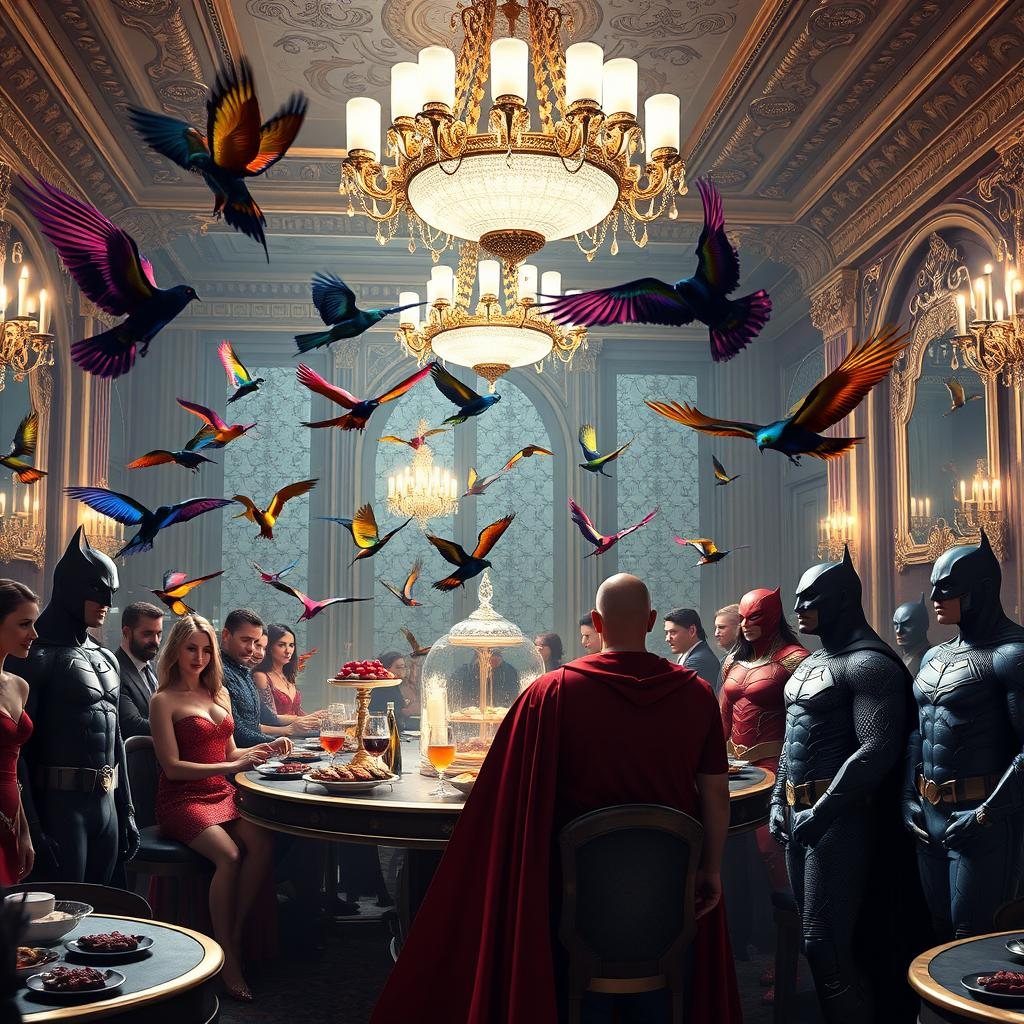

In [10]:
from smolagents import load_tool, CodeAgent, HfApiModel

image_generation_tool = load_tool(
    "m-ric/text-to-image",
    trust_remote_code=True
)

agent = CodeAgent(
    tools=[image_generation_tool],
    model=HfApiModel()
)

agent.run("Generate an image of a luxurious superhero-themed party at Wayne Manor with a lot of birds.")

## Importing a Hugging Face Space as a Tool

You can also import a HF Space as a tool using `Tool.from_space()`. This opens up possibilities for integrating with thousands of spaces from the community for tasks from image generation to data analysis.

The tool will connect with the spaces Gradio backend using the `gradio_client`, so make sure to install it via `pip` if you don't have it already. For the party, Alfred can also use a HF Space directly for the generation of the previous annoucement AI-generated image. Let's build it!

In [11]:
!pip install gradio_client

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 7.4 MB/s eta 0:00:00


In [ ]:
from smolagents import CodeAgent, HfApiModel, Tool

image_generation_tool = Tool.from_space(
    "black-forest-labs/FLUX.1-schnell",
    name="image_generator",
    description="Generate an image from a prompt"
)

model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")

agent = CodeAgent(tools=[image_generation_tool], model=model)

agent.run(
    "Improve this prompt, then generate an image of it.",
    additional_args={'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}
)

Loaded as API: https://black-forest-labs-flux-1-schnell.hf.space ✔


╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Improve this prompt, then generate an image of it.                                                              │
│ You have been provided with these additional arguments, that you can access using the keys as variables in your │
│ python code:                                                                                                    │
│ {'user_prompt': 'A grand superhero-themed party at Wayne Manor, with Alfred overseeing a luxurious gala'}.      │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Improve the prompt                                                                                             
  improved_prompt = "A grand, superhero-themed party at Wayne Manor, with elaborate decorations featuring capes,   
  masks, and cityscapes. Alfred Pemberton oversees a luxurious gala, ensuring every detail is perfect. The room    
  is filled with high Society guests dressed in superhero-themed attire, enjoying drinks and delicious food.       
  Flashing lights and holograms create a dynamic atmosphere that captures the spirit of Gotham City's elite."      
                                                                                                                   
  print(f"Improved Prompt: {improved_prompt}")                                                                     
                                                                                                                   
  # Generate an image of the improved prompt                                                                       
  image = image_generator(prompt=improved_prompt)                                                                  
  final_answer(image)                                                                                              
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Improved Prompt: A grand, superhero-themed party at Wayne Manor, with elaborate decorations featuring capes, masks,
and cityscapes. Alfred Pemberton oversees a luxurious gala, ensuring every detail is perfect. The room is filled 
with high Society guests dressed in superhero-themed attire, enjoying drinks and delicious food. Flashing lights 
and holograms create a dynamic atmosphere that captures the spirit of Gotham City's elite.

Out - Final answer: /tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp

[Step 0: Duration 31.37 seconds| Input tokens: 2,104 | Output tokens: 166]

'/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

In [12]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt

image_path = '/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

img = PILImage.open(image_path)
img

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/gradio/d5a8dfbade97e9b9d99f78d5ccaa73db6d4b8dc428662f2f25bde1de1bd77b81/image.webp'

In [13]:
from PIL import Image as PILImage
import matplotlib.pyplot as plt
import os

# Get the most recently modified file in the /tmp/gradio directory
gradio_dir = '/tmp/gradio/'
latest_file = max(
    [os.path.join(gradio_dir, f) for f in os.listdir(gradio_dir)],
    key=os.path.getmtime,
)

# Construct the image path using the latest file
image_path = os.path.join(latest_file, 'image.webp')


try:
  # Attempt to open the image
  img = PILImage.open(image_path)
  # Display the image using matplotlib if it was successfully opened
  plt.imshow(img)
  plt.axis('off')  # Turn off axis labels
  plt.show()
except FileNotFoundError:
  # If the file is not found, print an error message
  print(f"Error: Image file not found at {image_path}")

FileNotFoundError: [Errno 2] No such file or directory: '/tmp/gradio/'

## Importing a LangChain Tool

These tools need a [SerpApi API Key](https://serpapi.com/).

You can easily load LangChain tools using the `Tool.from_langchain()` method. Alfred, ever the perfectionist, is preparing for a spectacular superhero night at Wayne Manor while the Waynes are away. To make sure every detail exceeds expectations, he taps into LangChain tools to find top-tier entertainment ideas.

By using `Tool.from_langchain()`, Alfred effortlessly adds advanced search functionalities to his smolagent, enabling him to discover exclusive party ideas and services with just a few commands.

Here's how he does it:

In [14]:
!pip install langchain-community google-search-results

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.1/415.1 kB 25.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.6 MB/s eta 0:00:00
  Created wheel for google-search-results: filename=google_search_results-2.4.2-py3-none-any.whl size=32009 sha256=270d4fc8af027a832924e30b29b53d2f34f9ea21cde600bee6c5e68c42021e81
  Stored in directory: /root/.cache/pip/wheels/6e/42/3e/aeb691b02cb7175ec70e2da04b5658d4739d2b41e5f73cd06f
Successfully built google-search-results
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langchain-0.3.19:
      Succes

In [16]:
from google.colab import userdata
import os
os.environ["SERPAPI_API_KEY"] = userdata.get('SERPAPI_API_KEY')

In [18]:
from langchain.agents import load_tools
from smolagents import CodeAgent, HfApiModel, Tool

search_tool = Tool.from_langchain(load_tools(["serpapi"])[0])

# Define the model before using it
model = HfApiModel("Qwen/Qwen2.5-Coder-32B-Instruct")  # Or any other model you want to use
agent = CodeAgent(tools=[search_tool], model=model)

agent.run("Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive experiences.")

╭──────────────────────────────────────────────────── New run ────────────────────────────────────────────────────╮
│                                                                                                                 │
│ Search for luxury entertainment ideas for a superhero-themed event, such as live performances and interactive   │
│ experiences.                                                                                                    │
│                                                                                                                 │
╰─ HfApiModel - Qwen/Qwen2.5-Coder-32B-Instruct ──────────────────────────────────────────────────────────────────╯

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  live_performances = search(query="luxury live performances for superhero-themed event")                          
  interactive_experiences = search(query="luxury interactive experiences for superhero-themed event")              
  print(f"Live Performances:\n{live_performances}\n")                                                              
  print(f"Interactive Experiences:\n{interactive_experiences}\n")                                                  
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Live Performances:
[' entity_type: related_questions.', 'Eventbrite - The Doral Yard presents Superhero Party | Live Show at The Yard 
- Sunday, September 22, 2024 at The Doral Yard, Doral, FL.', 'Extravagant, Broadway-caliber live shows and 
entertainment throughout your cruise · A spectacular, Disney-themed fireworks show at sea on most itineraries · 
Watch ...', 'We bring the superhero party performer to you! Rent local superhero party characters from the only 
trusted source for quality party characters for kids.', 'Bring the excitement to your next party by inviting one 
(or more) of our superheroes like Spiderman, Thor, Wonder Woman, Captain America, Supergirl, Wolverine, ...', "All 
our performance packages have the necessities for making a great kids' party: live entertainment, fun activities, 
face painting, and photo opportunities ...", 'The event had a superhero theme, which was integrated in the programs
and stage backdrop. Sequence Events produced the award show.', 'This party lasts about 15 minutes and includes: up 
to 10 YOUNG GUESTS Signature "ACTION ENTRANCE" WARM HUGS & PICTURES WITH YOUR HERO/PIRATE AUTOGRAPHED ...', 'We 
provide superhero training, princess activities, art parties, comedy and martial arts demonstrations! I am a 
working DJ with 10+ years of experience DJing ...', 'We offer a range of superhero characters for hire, including 
Spiderman, Iron Man, and Batman, who will add a touch of excitement and adventure to your ...', 'Offering a variety
of Princess, Prince, Superhero and other popular characters for your events! Characters →.']

Interactive Experiences:
[' entity_type: related_questions.', 'MARVEL ORIGINS. Brush up on the Marvel Universe during this eye-opening, 
interactive Super Hero session. · FAMILY TRIVIA. A battle of wits! · ANIMATION ACADEMY.', 'Create a photo booth 
with props and backdrops representing different Marvel scenes. Encourage guests to strike their best superhero pose
for memorable snapshots ...', 'Our comprehensive package includes a wide array of exciting features such as 
Superhero obstacle course, Sports and the option to dress up in superhero costumes, ...', "For Amazon's new series 
The Tick, custom props and decor incorporated superhero nuances in a playful way.", 'Interactive Q&A: Organize a 
Q&A session with Marvel enthusiasts or invite comic book experts to share interesting trivia and behind-the-scenes 
stories. Include ...', 'Learn where to find Marvel on the Disney Destiny, setting sail in November 2025 with new 
ways to interact with the Marvel Universe.', 'Avengers Campus. The World Needs More Heroes! Team Up with the 
Avengers and Explore a Campus Welcoming New Super Heroes Throughout the Year—Including You!', '✔️ Interactive 
performances that engage and entertain. ✔️ Professional cosplayers for a realistic experience. ✔️ Perfect for family
days, corporate ...', 'What is included in a superhero party? · Fun games and prizes · Epic superhero story time · 
An extra special surprise for the VIP birthday boy/girl.', 'Invite the American Hero to your party, and enjoy 
activities like superhero training, an obstacle course, superhero themed games, balloon twisting, ...']


Out: None

[Step 1: Duration 11.40 seconds| Input tokens: 2,082 | Output tokens: 115]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

─ Executing parsed code: ──────────────────────────────────────────────────────────────────────────────────────── 
  # Compiling luxury entertainment ideas from the search results                                                   
  luxury_entertainment_ideas = {                                                                                   
      "Live Performances": [                                                                                       
          "Superhero Party Live Show - Featuring professional performers in superhero characters.",                
          "Broadway-caliber live shows and entertainment for a truly luxurious experience.",                       
          "Exclusive performances by superheroes like Spiderman, Thor, Wonder Woman, Captain America, Supergirl,   
  and Wolverine."                                                                                                  
      ],                                                                                                           
      "Interactive Experiences": [                                                                                 
          "MARVEL ORIGINS - An interactive session to brush up on the Marvel Universe.",                           
          "Superhero Obstacle Course - An exciting and engaging obstacle course for guests.",                      
          "Interactive Q&A with Marvel enthusiasts or comic book experts.",                                        
          "Avengers Campus - Interactive experiences that engage and entertain guests.",                           
          "Interactive photo booth with props and backdrops representing different Marvel scenes."                 
      ]                                                                                                            
  }                                                                                                                
                                                                                                                   
  # Printing the compiled ideas                                                                                    
  print("Luxury Entertainment Ideas for a Superhero-Themed Event:")                                                
  for category, ideas in luxury_entertainment_ideas.items():                                                       
      print(f"\n{category}:")                                                                                      
      for idea in ideas:                                                                                           
          print(f"- {idea}")                                                                                       
                                                                                                                   
  # Final answer with the compiled luxury entertainment ideas                                                      
  final_answer(luxury_entertainment_ideas)                                                                         
 ─────────────────────────────────────────────────────────────────────────────────────────────────────────────────

Execution logs:
Luxury Entertainment Ideas for a Superhero-Themed Event:

Live Performances:
- Superhero Party Live Show - Featuring professional performers in superhero characters.
- Broadway-caliber live shows and entertainment for a truly luxurious experience.
- Exclusive performances by superheroes like Spiderman, Thor, Wonder Woman, Captain America, Supergirl, and 
Wolverine.

Interactive Experiences:
- MARVEL ORIGINS - An interactive session to brush up on the Marvel Universe.
- Superhero Obstacle Course - An exciting and engaging obstacle course for guests.
- Interactive Q&A with Marvel enthusiasts or comic book experts.
- Avengers Campus - Interactive experiences that engage and entertain guests.
- Interactive photo booth with props and backdrops representing different Marvel scenes.

Out - Final answer: {'Live Performances': ['Superhero Party Live Show - Featuring professional performers in 
superhero characters.', 'Broadway-caliber live shows and entertainment for a truly luxurious experience.', 
'Exclusive performances by superheroes like Spiderman, Thor, Wonder Woman, Captain America, Supergirl, and 
Wolverine.'], 'Interactive Experiences': ['MARVEL ORIGINS - An interactive session to brush up on the Marvel 
Universe.', 'Superhero Obstacle Course - An exciting and engaging obstacle course for guests.', 'Interactive Q&A 
with Marvel enthusiasts or comic book experts.', 'Avengers Campus - Interactive experiences that engage and 
entertain guests.', 'Interactive photo booth with props and backdrops representing different Marvel scenes.']}

[Step 2: Duration 13.66 seconds| Input tokens: 5,086 | Output tokens: 402]

{'Live Performances': ['Superhero Party Live Show - Featuring professional performers in superhero characters.',
  'Broadway-caliber live shows and entertainment for a truly luxurious experience.',
  'Exclusive performances by superheroes like Spiderman, Thor, Wonder Woman, Captain America, Supergirl, and Wolverine.'],
 'Interactive Experiences': ['MARVEL ORIGINS - An interactive session to brush up on the Marvel Universe.',
  'Superhero Obstacle Course - An exciting and engaging obstacle course for guests.',
  'Interactive Q&A with Marvel enthusiasts or comic book experts.',
  'Avengers Campus - Interactive experiences that engage and entertain guests.',
  'Interactive photo booth with props and backdrops representing different Marvel scenes.']}

With this setup, Alfred can quickly discover luxurious entertainment options, ensuring Gotham's elite guests have an unforgettable experience. This tool helps him curate the perfect superhero-themed event for Wayne Manor! 🎉